In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

import mne

Using default location ~/mne_data for ssvep...


100%|█████████████████████████████████████| 39.5M/39.5M [00:00<00:00, 11.6GB/s]
Unzipping contents of '/u/fklotzsche/mne_data/ssvep_example_data.zip' to '/u/fklotzsche/mne_data'


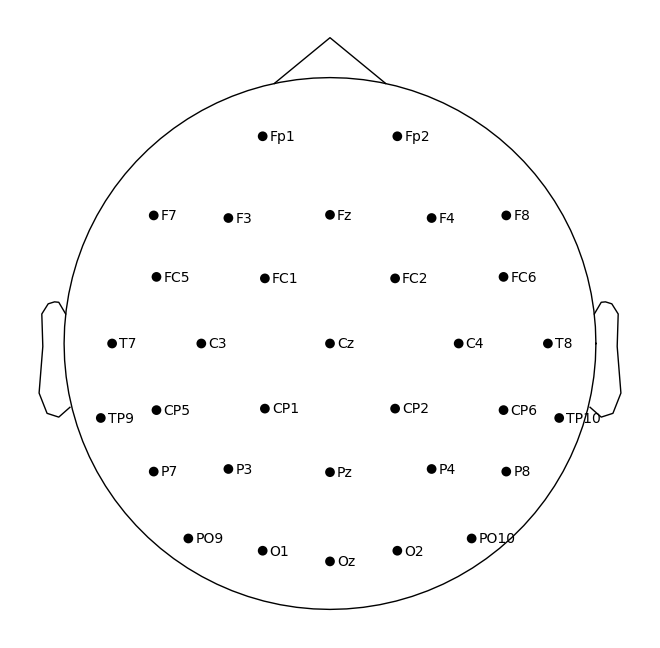

In [2]:
easycap_montage = mne.channels.make_standard_montage('easycap-M1')
ssvep_folder = mne.datasets.ssvep.data_path()
ssvep_data_raw_path = (ssvep_folder / 'sub-02' / 'ses-01' / 'eeg' /
                       'sub-02_ses-01_task-ssvep_eeg.vhdr')
ssvep_raw = mne.io.read_raw_brainvision(ssvep_data_raw_path, verbose=False)

# Use the preloaded montage
ssvep_raw.set_montage(easycap_montage)
fig = ssvep_raw.plot_sensors(show_names=True)


In [11]:
chan_sel = mne.channels.make_1020_channel_selections(ssvep_raw.info)
ssvep_left = ssvep_raw.copy().pick(chan_sel['Left'])
chan_adj, ch_n = mne.channels.find_ch_adjacency(ssvep_left.info, 'eeg')

<RawBrainVision | sub-02_ses-01_task-ssvep_eeg.eeg, 14 x 467580 (467.6 s), ~34 kB, data not loaded>

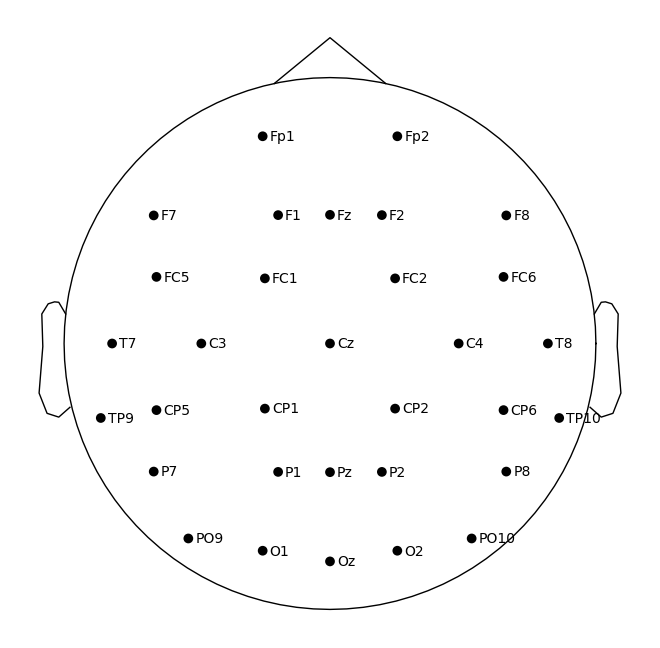

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 32
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 14


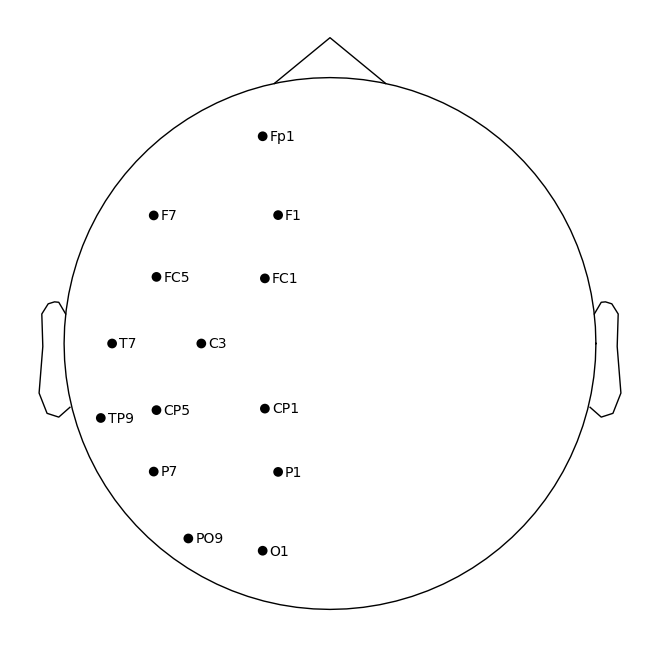

In [28]:

ssn = ssvep_raw.copy().rename_channels({'P3': 'P1', 'P4': 'P2', 'F3': 'F1', 'F4': 'F2'})
ssn.set_montage(easycap_montage)
fig = ssn.plot_sensors(show_names=True)
chan_adj, ch_n = mne.channels.find_ch_adjacency(ssn.info, 'eeg')
ssvep_left = ssn.copy().pick(chan_sel['Left'])
chan_adj, ch_n = mne.channels.find_ch_adjacency(ssvep_left.info, 'eeg')
fig = ssvep_left.plot_sensors(show_names=True)

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 32


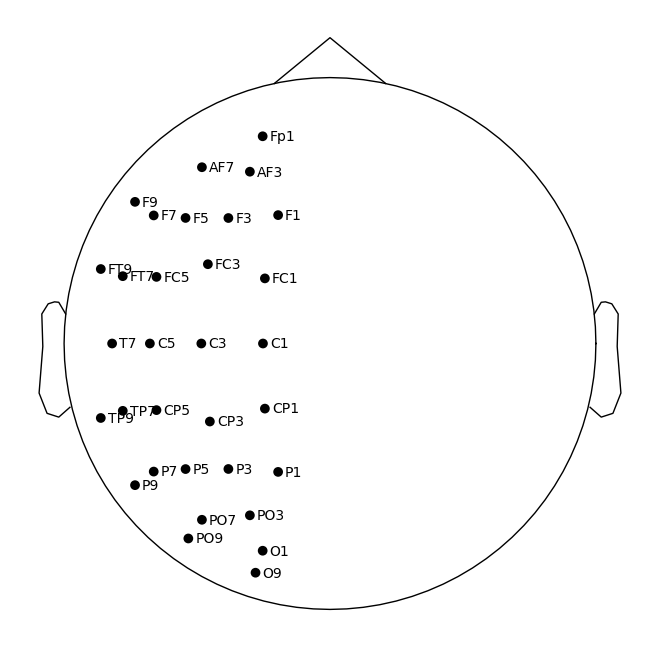

In [57]:
easycap_montage = mne.channels.make_standard_montage('easycap-M1')
info_full = mne.create_info(ch_names=easycap_montage.ch_names,
                            sfreq=1,
                            ch_types='eeg')
info_full.set_montage(easycap_montage)
ch_sel = mne.channels.make_1020_channel_selections(info_full)
chs_left = [info_full.ch_names[i] for i in ch_sel['Left']]
info_left = mne.create_info(ch_names=chs_left,
                            sfreq=1,
                            ch_types='eeg')
info_left.set_montage(easycap_montage)
chan_adj, ch_n = mne.channels.find_ch_adjacency(info_left, 'eeg')
fig = mne.viz.plot_sensors(info_left, show_names=True)

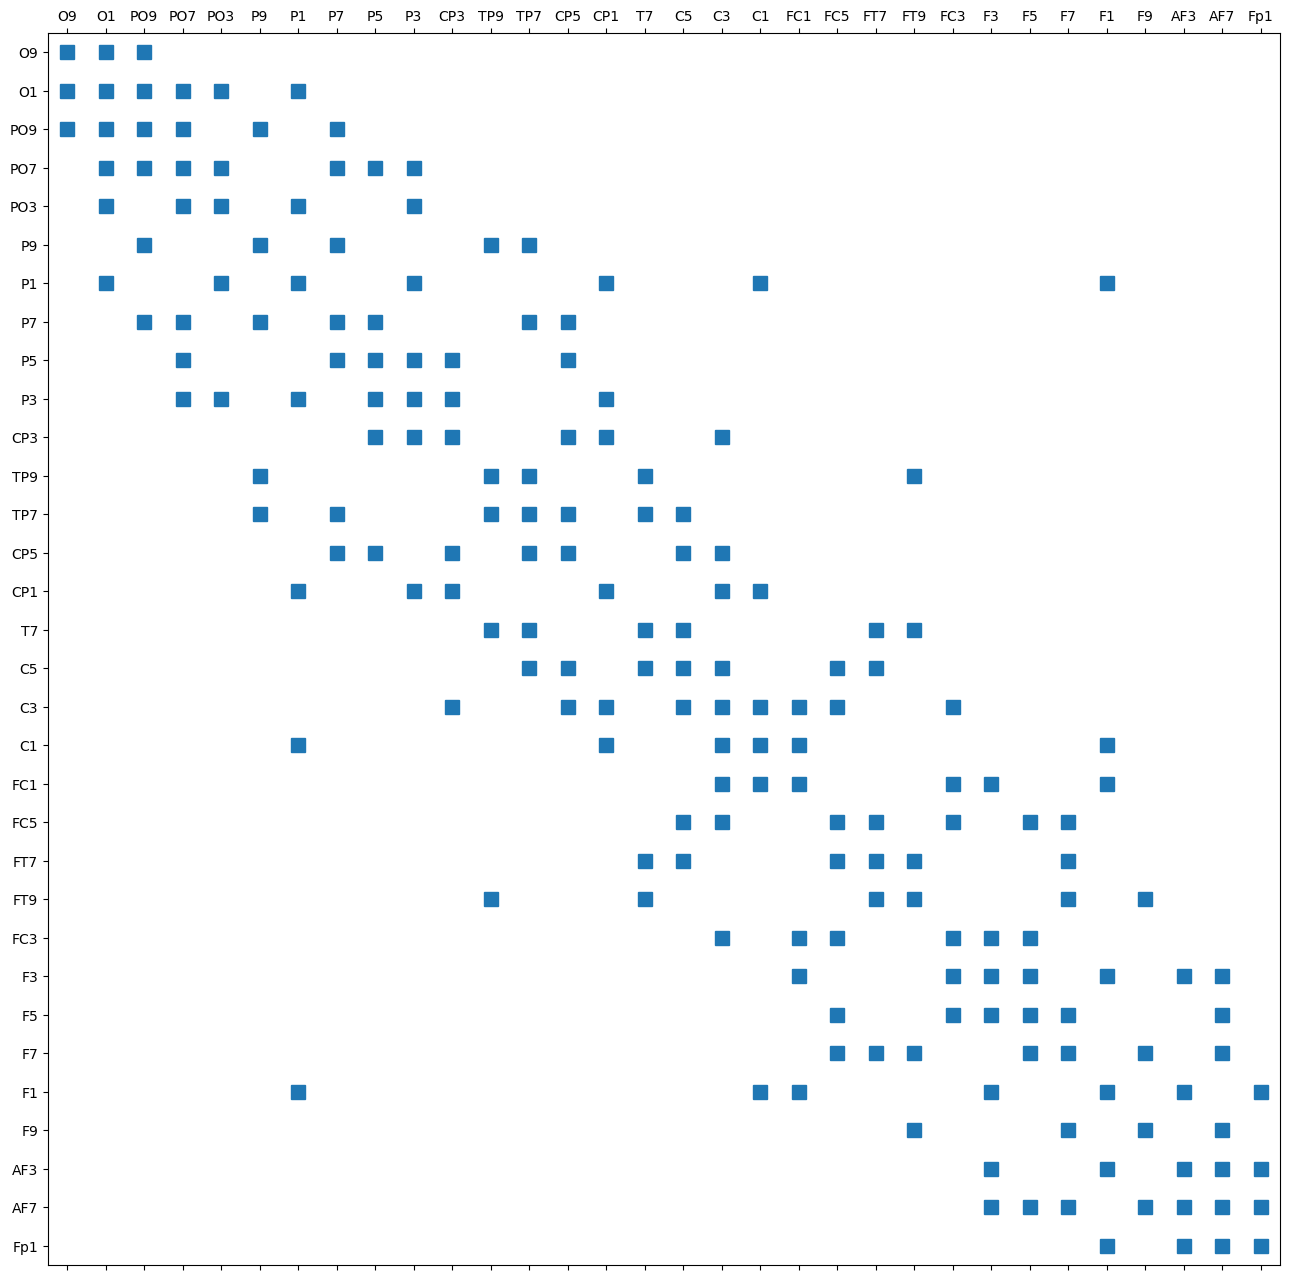

In [58]:
fig, ax = plt.subplots(figsize=(16,16))
ax.spy(chan_adj)
ax.set_xticks(range(len(ch_n)))
ax.set_xticklabels(ch_n)
ax.set_yticks(range(len(ch_n)))
ax.set_yticklabels(ch_n)
plt.show()

In [64]:
idx_f1 = info_left.ch_names.index('F1')
idx_p1 = info_left.ch_names.index('P1')
assert chan_adj[idx_f1, idx_p1] == 0

AssertionError: 

Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 32


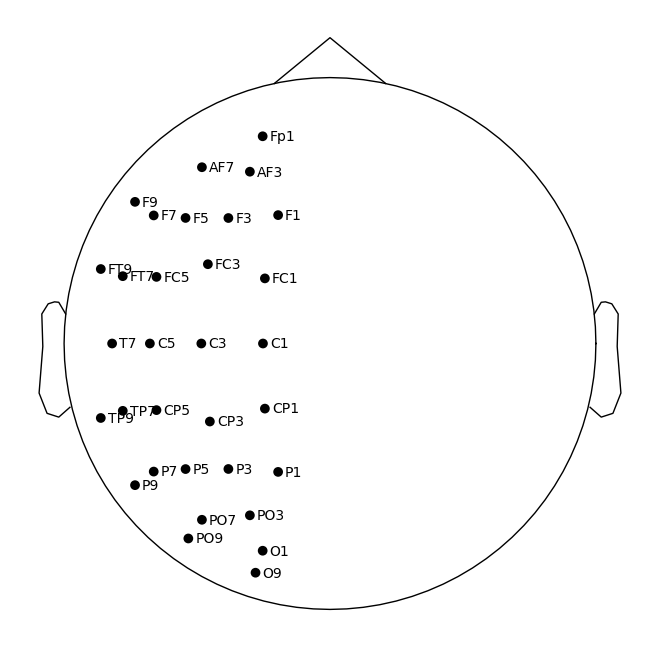

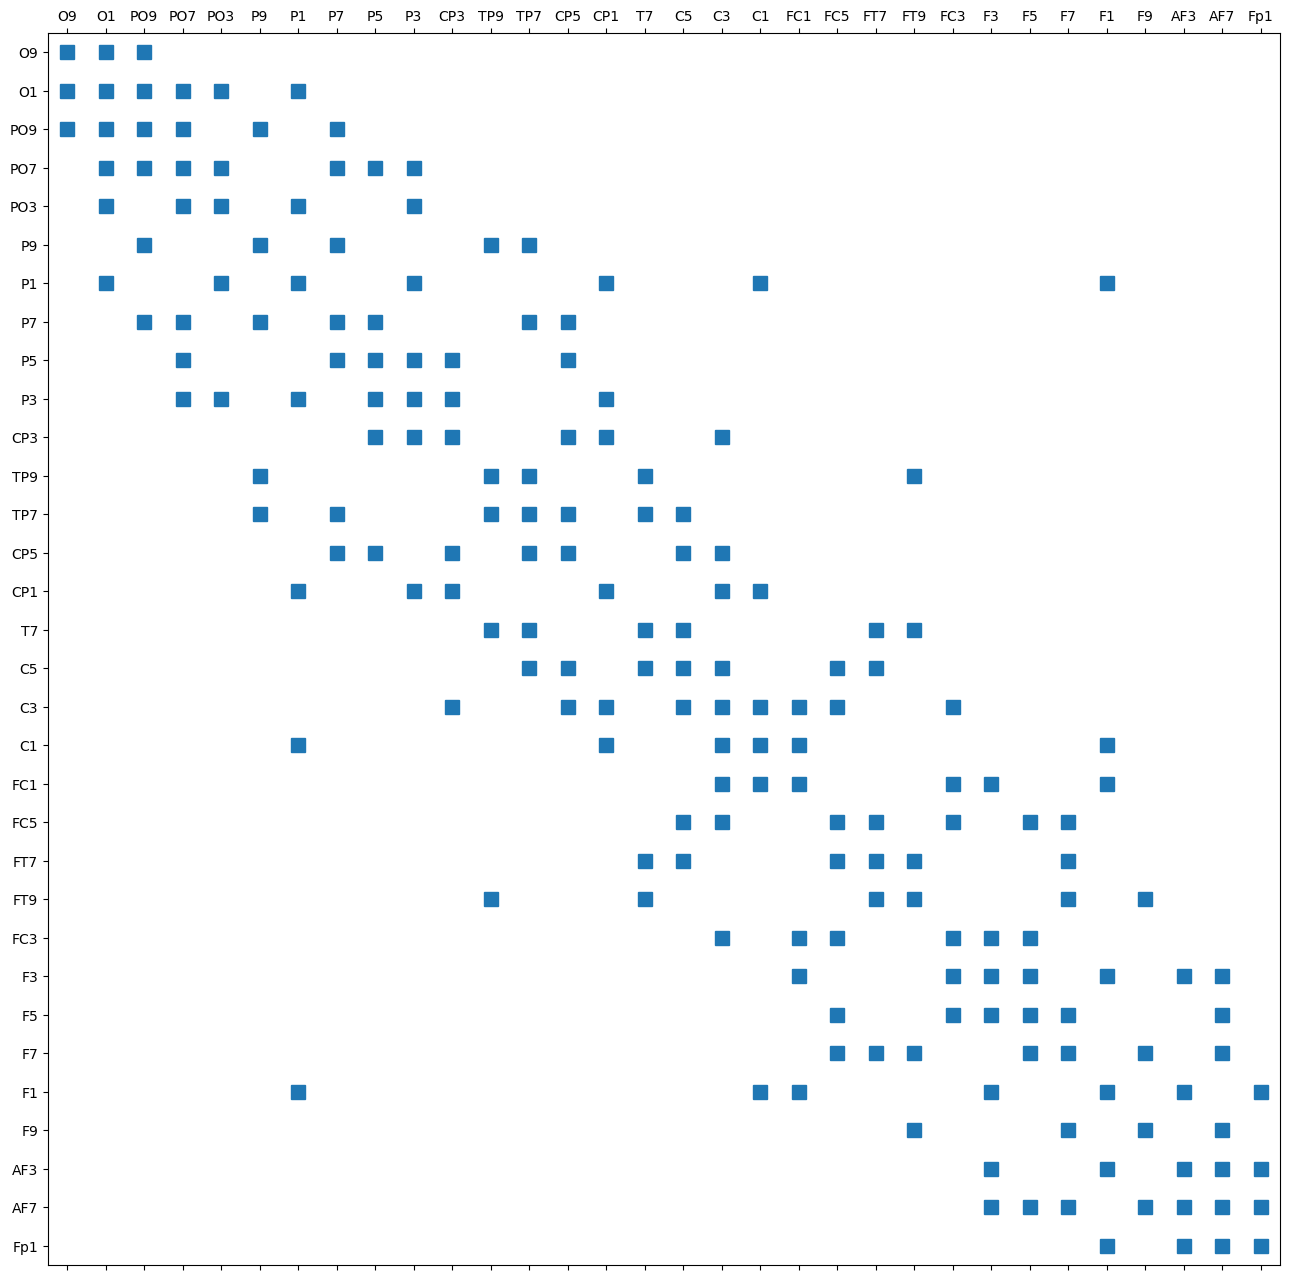

P1 and F1 adjacency (left sensors): 1
Could not find a adjacency matrix for the data. Computing adjacency based on Delaunay triangulations.
-- number of adjacent vertices : 74
P1 and F1 adjacency (all sensors): 0


In [6]:
import mne
import matplotlib.pyplot as plt

easycap_montage = mne.channels.make_standard_montage('easycap-M1')
info_full = mne.create_info(ch_names=easycap_montage.ch_names,
                            sfreq=1,
                            ch_types='eeg')
info_full.set_montage(easycap_montage)
ch_sel = mne.channels.make_1020_channel_selections(info_full)
chs_left = [info_full.ch_names[i] for i in ch_sel['Left']]
info_left = mne.create_info(ch_names=chs_left,
                            sfreq=1,
                            ch_types='eeg')
info_left.set_montage(easycap_montage)
chan_adj, ch_n = mne.channels.find_ch_adjacency(info_left, 'eeg')
fig = mne.viz.plot_sensors(info_left, show_names=True)
# looks ok and, importantly, P1 and F1 are no neighbours

fig, ax = plt.subplots(figsize=(16,16))
ax.spy(chan_adj)
ax.set_xticks(range(len(ch_n)))
ax.set_xticklabels(ch_n)
ax.set_yticks(range(len(ch_n)))
ax.set_yticklabels(ch_n)
plt.show()

idx_f1 = info_left.ch_names.index('F1')
idx_p1 = info_left.ch_names.index('P1')
print("P1 and F1 adjacency (left sensors): " + str(chan_adj[idx_f1, idx_p1]))

# whereas:
chan_adj_full, ch_n_full = mne.channels.find_ch_adjacency(info_full, 'eeg')
idx_f1 = info_full.ch_names.index('F1')
idx_p1 = info_full.ch_names.index('P1')
print("P1 and F1 adjacency (all sensors): " + str(chan_adj_full[idx_f1, idx_p1]))

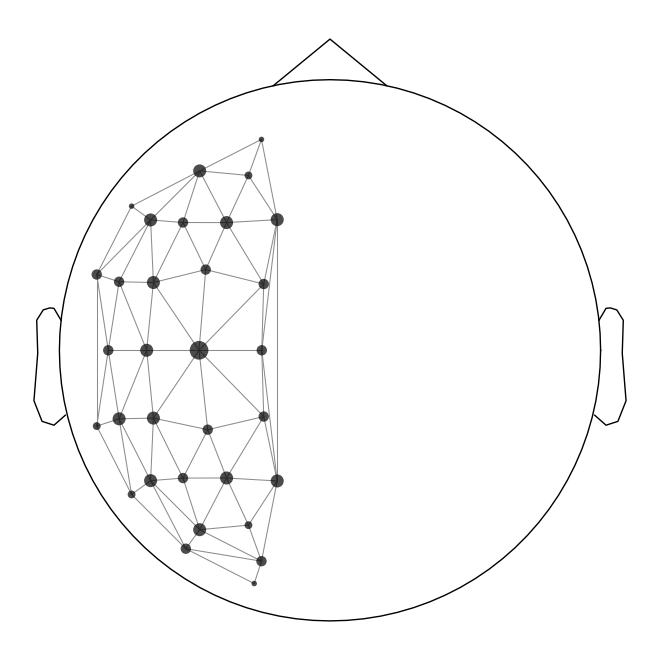

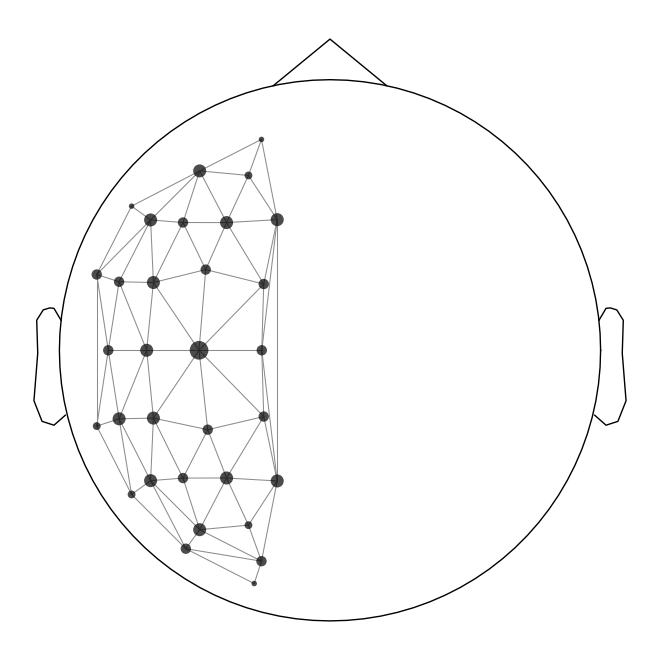

In [10]:
mne.viz.plot_ch_adjacency(info_left, chan_adj, ch_n)